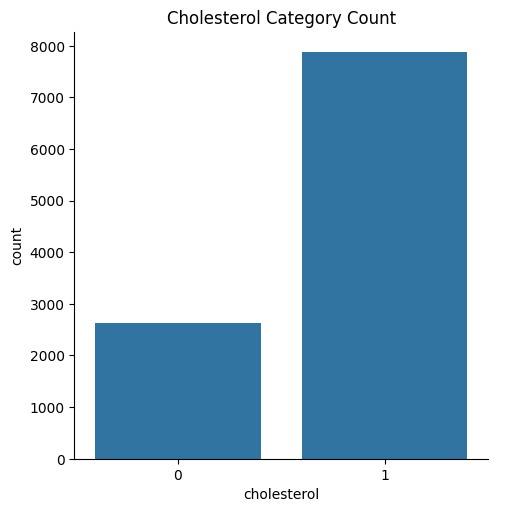

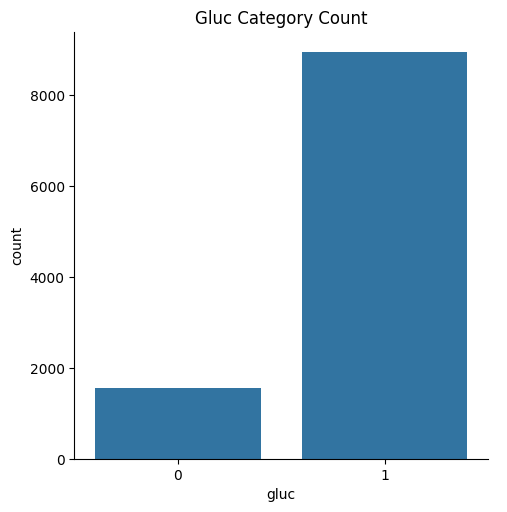

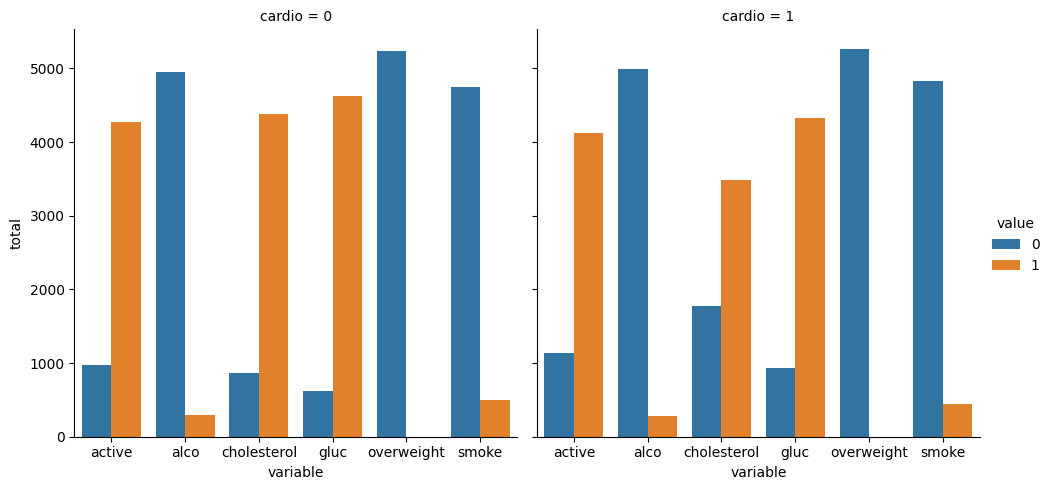

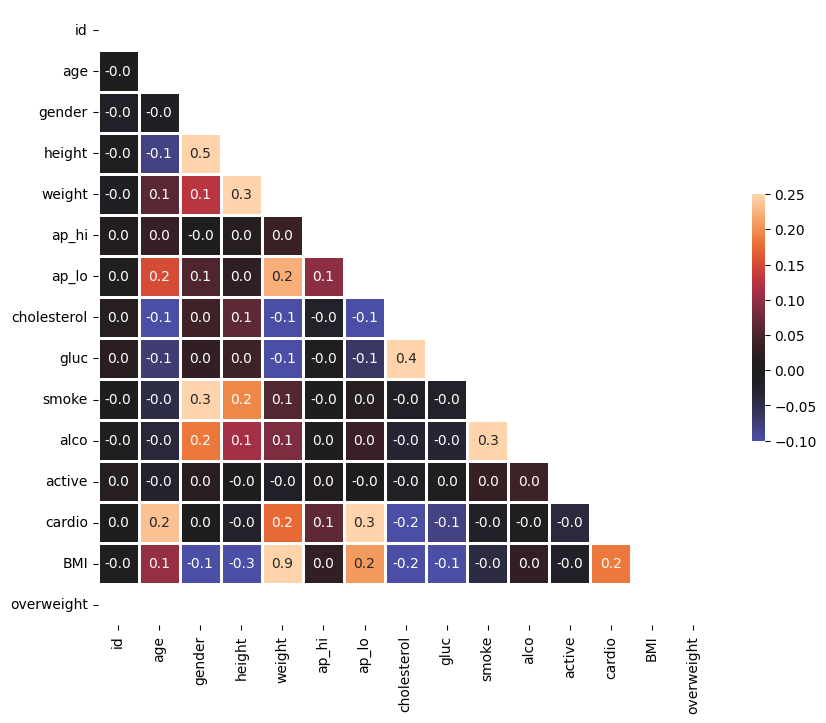

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('D:/medical - Copy - Copy.TXT', nrows=17900, header=0)

# Addition of the 'overweight' column based on BMI criteria
df['BMI'] = df['weight'] / (df['height'] ** 2)
df['overweight'] = df['BMI'] > 25

#'Overweight' column with 0 or 1
df['overweight'] = (df['BMI'] > 25).astype(int)

# If the value of cholesterol or gluc is 1, the value to 0. If the value is more than 1, the value is 1.
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

# Drawing the Categorical Plot
def draw_cat_plot(data):
    # Transforming cholesterol and gluc columns
    data['cholesterol'] = data['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
    data['gluc'] = data['gluc'].apply(lambda x: 0 if x == 1 else 1)
    
    # categorical plot for cholesterol
    sns.catplot(x='cholesterol', kind='count', data=data)
    plt.title('Cholesterol Category Count')
    plt.show()

    # categorical plot for gluc
    sns.catplot(x='gluc', kind='count', data=data)
    plt.title('Gluc Category Count')
    plt.show()

draw_cat_plot(df)

columns = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
df_cat_melted = pd.melt(df, id_vars='cardio', value_vars=columns)
df_cat_melted['total'] = 1

# Grouping and reformating the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
df_cat = df_cat_melted.groupby(['cardio', 'variable', 'value'], as_index=False).count()
df_cat

# Drawing the catplot with 'sns.catplot()'
fig = sns.catplot(x='variable', y='total', hue='value', data=df_cat, col='cardio', kind='bar').fig

# fig.savefig('catplot.png')
# return fig

# Drawing the Heat Map
def draw_heat_map(df):
    # Clean the data
    filter1 = df['ap_lo'] <= df['ap_hi']   
    filter2 = df['height'] >= df['height'].quantile(0.025)
    filter3 = df['height'] <= df['height'].quantile(0.975)
    filter4 = df['weight'] >= df['weight'].quantile(0.025)
    filter5 = df['weight'] <= df['weight'].quantile(0.975)    
    
    df_heat = df[filter1 & filter2 & filter3 & filter4 & filter5]
    
    # Calculation of the correlation matrix
    corr = df_heat.corr(method='pearson')
    
    # Generating a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(corr, 
        mask=mask, 
        annot=True, 
        fmt=".1f", 
        linewidths=1, 
        center=0.0, 
        vmax=0.25, 
        vmin=-0.1, 
        square=True, 
        cbar_kws={"shrink": 0.4})

    plt.show()

draw_heat_map(df)
